# **Introduction**

Welcome to your second programming assignment of the Algorithmic Toolbox at Coursera! It consists of eight
programming challenges. Three of them require you just to implement carefully the algorithms covered in
the lectures. The remaining challenges will require you to first design an algorithm and then to implement it.
For all the challenges, we provide starter solutions in C++, Java, and Python3. These solutions implement
straightforward algorithms that usually work only for small inputs. To verify this, you may want to submit
these solutions to the grader. This will usually give you a “time limit exceeded” message for Python
starter files and either “time limit exceeded” or “wrong answer” message for C++ and Java solutions (the
reason for wrong answer being an integer overflow issue). Your goal is to replace a naive algorithm with
an efficient one. In particular, you may want to use the naive implementation for stress testing your efficient
implementation.
In this programming assignment, the grader will show you the input data if your solution fails on any
of the tests. This is done to help you to get used to the algorithmic problems in general and get some
experience debugging your programs while knowing exactly on which tests they fail. However, for all the
following programming assignments, the grader will show the input data only in case your solution fails on
one of the first few tests.

## Fibonacci Number

Problem Description

**Task.** Given an integer $n$, find the $n$th Fibonacci number $Fn$.

**Input Format.** The input consists of a single integer $n$.

**Constraints.** 0 ≤ $n$ ≤ 45.

**Output Format.** Output $Fn$.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`10`

Output:

`50`

$𝐹_{10}$ = $55$.

In [ ]:
# Naive Solution

# Python3

import time

def calc_fib(n):
    if (n <= 1):
        return n

    return calc_fib(n - 1) + calc_fib(n - 2)

n1 = int(input())
start_time = time.time()
print(calc_fib(n1))
print("--- %s seconds ---" % (time.time() - start_time))


10
55
--- 0.00023293495178222656 seconds ---


In [ ]:
# List Solution

# Python3

import time

def fib_list(n):
     fib = [0, 1]
     for i in range(2, n+1):
         fib.append(fib[-1] + fib[-2])
     return fib

n2 = int(input())
start_time = time.time()
print(fib_list(n2)[n2])
print("--- %s seconds ---" % (time.time() - start_time))

100
354224848179261915075
--- 0.00025200843811035156 seconds ---


## Last Digit of a Large Fibonacci Number

Problem Description

**Task.** Given an integer $n$, find the last digit of the $n$th Fibonacci number $Fn$ (that is, $Fn$ $mod 10$).

**Input Format.** The input consists of a single integer 𝑛.

**Constraints.** 0 ≤ 𝑛 ≤ 107.

**Output Format.** Output the last digit of 𝐹𝑛.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`3`

Output:

`2`

$F_3$ = $2$.

In [ ]:
# Naive Solution

# Python3

import sys

def get_fibonacci_last_digit_naive(n):
    if n <= 1:
        return n

    previous = 0
    current  = 1

    for i in range(n - 1):
        previous, current = current, previous + current

    return current % 10

if __name__ == '__main__':
    input = sys.stdin.read()
    n3 = int(input)
    print(get_fibonacci_last_digit_naive(n3))

In [ ]:
# Solutions Study

# Python3

import time

# MAKING USE OF THE PREVIOUS LIST ALGORITHM IS BLOODY SLOW FOR NUMBERS BIGGER THAN 1000

# def fib_list(n):
#      fib = [0, 1]
#      for i in range(2, n+1):
#          fib.append(fib[-1] + fib[-2])
#      return fib

def last_digit(n):
    last = n % 10
    return last     

# n = int(input())
# a = fib_list(n)[n]
# print(last_digit(a))

# THE DICTIONARY IS EVEN FASTER FOR SMALL FIBONACCI NUMBER, BUT ONCE AGAIN, DAMN SLOW FOR BIGGER NUMBERS

# def fib_dic(n, prev_comp = {0: 0, 1: 1}):
#      if n not in prev_comp:
#          prev_comp[n] = fib_dic(n-1, prev_comp) + fib_dic(n-2, prev_comp)
#      return prev_comp[n]

# n = int(input())
# a = fib_dic(n)
# print(a)
# print(last_digit(a))

# IN DESPERATION I FOUND THE MATRIX METHOD!

def fib_matrix(n):
    v1, v2, v3 = 1, 1, 0    # make a new a matrix [[1,1],[1,0]], initialiazed
    for rec in bin(n)[3:]:  # quickly raising it to the nth power
        calc = v2*v2
        v1, v2, v3 = v1*v1+calc, (v1+v3)*v2, calc+v3*v3
        if (rec=='1'):
            v1, v2, v3 = v1+v2, v1, v2
    return v2

fibnum = int(input())
start_time = time.time()
a = fib_matrix(fibnum)
print(last_digit(a))
print("--- %s seconds ---" % (time.time() - start_time))

10000
5
--- 0.0003058910369873047 seconds ---


## Greatest Common Divisor

Problem Description

**Task.** Given two integers $a$ and $b$, find their greatest common divisor.

**Input Format.** The two integers $a$, $b$ are given in the same line separated by space.

**Constraints.** 1 ≤ $a$, $b$ ≤ 2 · 109.

**Output Format.** Output GCD($a$, $b$).

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`18 35`

Output:

`1`

18 and 35 do not have common non-trivial divisors.

In [ ]:
#Naive Solution

# Python3

import sys

def gcd_naive(a, b):
    current_gcd = 1
    for d in range(2, min(a, b) + 1):
        if a % d == 0 and b % d == 0:
            if d > current_gcd:
                current_gcd = d

    return current_gcd

if __name__ == "__main__":
    input = sys.stdin.read()
    a, b = map(int, input.split())
    print(gcd_naive(a, b))

In [ ]:
# Euclid Solution

# Python3

import time

def euclid_gcd(a, b):
    c = a % b
    if(c != 0):
        return euclid_gcd(b, c)
    else:
        return b


if __name__ == "__main__": 
    a, b = [int(i) for i in input().split()]
    start_time = time.time()
    print(euclid_gcd(a, b))
    print("--- %s seconds ---" % (time.time() - start_time))

18 35
1
--- 0.00011801719665527344 seconds ---


## Least Common Multiple

Problem Description

**Task.** Given two integers 𝑎 and 𝑏, find their least common multiple.

**Input Format.** The two integers 𝑎 and 𝑏 are given in the same line separated by space.

**Constraints.** 1 ≤ 𝑎, 𝑏 ≤ 107.

**Output Format.** Output the least common multiple of 𝑎 and 𝑏.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`6 8`

Output:

`24`

Among all the positive integers that are divisible by both 6 and 8 (e.g., 48, 480, 24), 24 is the smallest one.

In [ ]:
# Naive Solution

# Python3

import sys

def lcm_naive(a, b):
    for l in range(1, a*b + 1):
        if l % a == 0 and l % b == 0:
            return l

    return a*b

if __name__ == '__main__':
    input = sys.stdin.read()
    a, b = map(int, input.split())
    print(lcm_naive(a, b))

In [ ]:
# Euclid Solution

# Python3

import time

def euclid_lcm(a,b):
    div = euclid_gcd(a, b)
    val = (a * b) // div # divide with integral result (discard remainder)
    return val

if __name__ == "__main__":
    a, b = map(int, input().split())
    start_time = time.time()
    print(euclid_lcm(a, b))
    print("--- %s seconds ---" % (time.time() - start_time))

6 8
24
--- 0.000125885009765625 seconds ---


## Fibonacci Number Again

Problem Description

**Task.** Given two integers $n$ and $m$, output $Fn$ *mod* $m$ (that is, the remainder of $Fn$ when divided by $m$).

**Input Format.** The input consists of two integers $n$ and $m$ given on the same line (separated by a space).

**Constraints.** 1 ≤ $n$ ≤ 1014, 2 ≤ $m$ ≤ 103.

**Output Format.** Output $Fn$ *mod* $m$.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`239 1000`

Output:

`161`

$F_{239}$ *mod* $1000$ = $39 679 027 332 006 820 581 608 740 953 902 289 877 834 488 152 161$ $\%$ $1000$ = $161$.

In [ ]:
# Naive Solution

# Python3
import sys

def get_fibonacci_huge_naive(n, m):
    if n <= 1:
        return n

    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current, previous + current

    return current % m

if __name__ == '__main__':
    input = sys.stdin.read();
    n, m = map(int, input.split())
    print(get_fibonacci_huge_naive(n, m))

In [ ]:
# Dictionary Method

# Python3

import time

def fib_mod(n, m):
    
    cache = {0: 0, 1: 1}

    def fib_m(n):
        if n in cache:
            return cache[n]

        if n % 2 == 0:
            fib_half_n = fib_m(n // 2)
            result = (2 * fib_m(n // 2 - 1) + fib_half_n) * fib_half_n
        else:
            result = fib_m((n + 1) // 2) ** 2 + fib_m((n - 1) // 2) ** 2

        cache[n] = result = result % m
        return result

    return fib_m(n)

if __name__ == "__main__":
    n, m = map(int, input().split())
    start_time = time.time()
    print(fib_mod(n, m))
    print("--- %s seconds ---" % (time.time() - start_time))


239 1000
161
--- 0.00015926361083984375 seconds ---


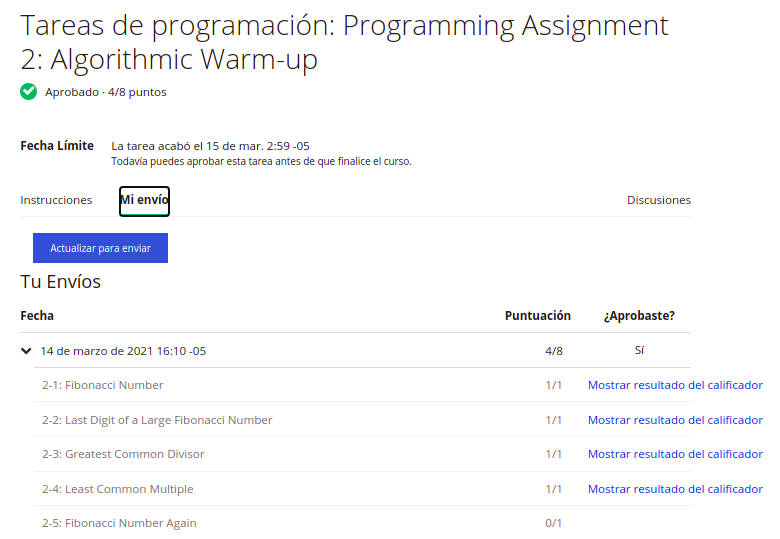